In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
df= pd.read_csv("C:/Users/chowd/OneDrive/Desktop/Bank Customer Churn Prediction.csv")

In [2]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [161]:
pd.DataFrame(df.columns,columns=['Column Names'])

,Column Names
0,customer_id
1,credit_score
2,country
3,gender
4,age
5,tenure
6,balance
7,products_number
8,credit_card
9,active_member


In [5]:
df.shape  # Rows and columns in the dataset

(10000, 12)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
 12  AgeGroup          10000 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.describe().T  # Statistical features of the dataset

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [10]:
# Checking for missing values
pd.DataFrame(df.isnull().sum(),columns = ['Count of missing values'])

,Count of missing values
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [164]:
# Checking for duplicate values
df[df.duplicated()]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,AgeGroup


In [13]:
# Statistical features for the categorical columns
df.describe(include=[object])

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [20]:
churned_no = df.query('churn==1').count()['churn']
not_churned_no = df.query('churn==0').count()['churn']
churn_data = [['Churned',churned_no],['Not Churned',not_churned_no]]
churn_df= pd.DataFrame(churn_data, columns =['Churn Status','Churn Rate(%)'])
churn_df

,Churn Status,Churn Rate(%)
0,Churned,2037
1,Not Churned,7963


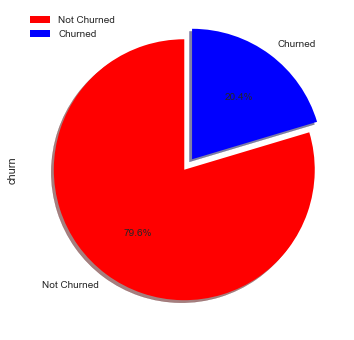

In [85]:
plt.style.use('seaborn')
churned= pd.DataFrame(df['churn'].value_counts())
explode = (0.0,0.1)
colors = ['red','blue']
labels = 'Not Churned','Churned'
churned.plot.pie(y='churn',figsize=(6,6),colors = colors, autopct='%1.1f%%',explode=explode,startangle=90,shadow=True,labels=labels)
plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

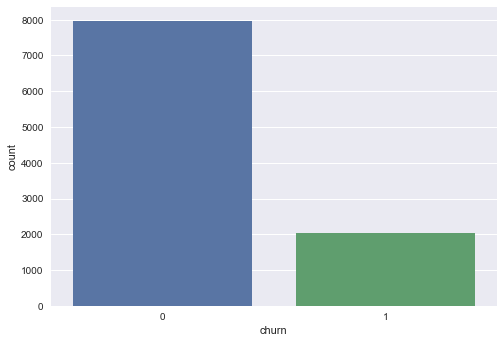

In [31]:
# Creating a countplot
sns.countplot(x='churn',data = df)

In [32]:
# We see that the bank retained about 79.6% of the total 10000 customers while those who churned was around 20.4%.

In [33]:
# Now we'll be analyzing the impact of various factors on the churn rate
# Analyzing the effect of the two categorical variables country & gender on the churn rate

Text(0, 0.5, 'Number of customers in each country')

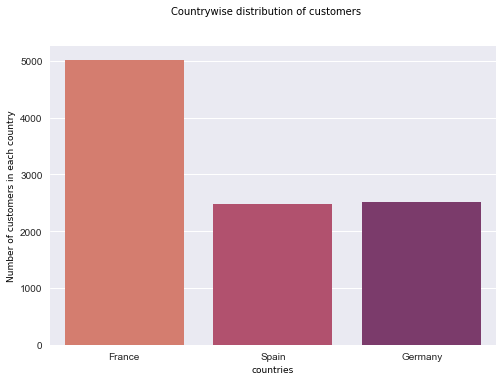

In [45]:
# Analyzing the impact of country on the churn status of customers
customers = pd.DataFrame(df['country'].value_counts())
plt.suptitle('Countrywise distribution of customers',size=10, fontname ='Ariel',color='k')
sns.countplot(x='country',data = df,palette= 'flare')
plt.xlabel('countries',size=9,fontname='Ariel',color='k')
plt.ylabel('Number of customers in each country',size=9,fontname='Ariel',color='k')

<AxesSubplot:xlabel='country', ylabel='count'>

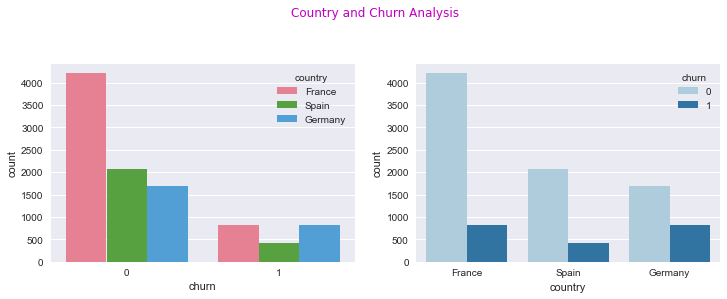

In [40]:
plt.figure(figsize=(12,8))
plt.suptitle('Country and Churn Analysis',size=12,fontname='Ariel',color='m')
plt.subplot(2,2,1)
sns.countplot(x='churn',hue='country',data=df,palette='husl')

plt.subplot(2,2,2)
sns.countplot(x='country',hue='churn',data=df,palette='Paired')

In [52]:
total_churn = df.query('churn==1').count()['churn']
france_churn_number=df.query('country=="France" & churn==1').count()['churn']
france_churn_rate = round((france_churn_number/total_churn)*100,2)
germany_churn_number=df.query('country=="Germany" & churn ==1').count()['churn']
germany_churn_rate = round((germany_churn_number/total_churn)*100,2)
spain_churn_number= df.query('country=="Spain" & churn==1').count()['churn']
spain_churn_rate = round((spain_churn_number/total_churn)*100,2)
country_churn_data = [['France',france_churn_rate],['Germany',germany_churn_rate],['Spain',spain_churn_rate]]
country_churn_df=pd.DataFrame(country_churn_data,columns=["country","churn rate(%)"])
country_churn_df

,country,churn rate(%)
0,France,39.76
1,Germany,39.96
2,Spain,20.27


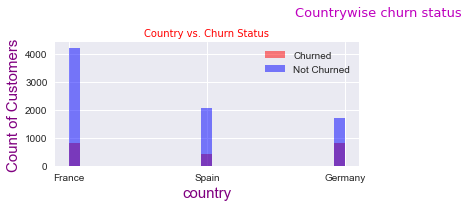

In [59]:
# Plotting a histogram to check normality of the data
plt.style.use('seaborn')
plt.figure(figsize=(12,5))
plt.suptitle('Countrywise churn status',fontname='Ariel',size=13,color='m')

plt.subplot(2,2,1)
plt.hist(df[df['churn']==1]['country'],bins=25,alpha=0.5,color='red',label='Churned')
plt.hist(df[df['churn']==0]['country'],bins=25,alpha=0.5,color='blue',label='Not Churned')

plt.xlabel('country',size=15,color='purple')
plt.ylabel('Count of Customers',size= 15,color='purple')
plt.title('Country vs. Churn Status',color='red',fontname='Ariel',size=10)
plt.legend()

In [61]:
# The data is not normally distributed as visible from the above histogram.
france_bank= df[df['country']=='France']
germany_bank= df[df['country']=='Germany']
spain_bank= df[df['country']=='Spain']
print(stats.describe(france_bank['churn']))
print(stats.describe(germany_bank['churn']))
print(stats.describe(spain_bank['churn']))

DescribeResult(nobs=5014, minmax=(0, 1), mean=0.16154766653370561, variance=0.13547703772345868, skewness=1.8392381849392303, kurtosis=1.3827971009385536)
DescribeResult(nobs=2509, minmax=(0, 1), mean=0.32443204463929853, variance=0.21926328375742063, skewness=0.7500303797248297, kurtosis=-1.4374544294898277)
DescribeResult(nobs=2477, minmax=(0, 1), mean=0.1667339523617279, variance=0.13898985366502678, skewness=1.788204572111019, kurtosis=1.1976755917187534)


In [62]:
stats.kruskal(france_bank['churn'],germany_bank['churn'],spain_bank['churn'])

KruskalResult(statistic=301.22521129066496, pvalue=3.888449500851512e-66)

In [63]:
# Since the p-value < 0.05 we can reject the null and conclude that country has an impact on the churn rate

<AxesSubplot:xlabel='gender', ylabel='count'>

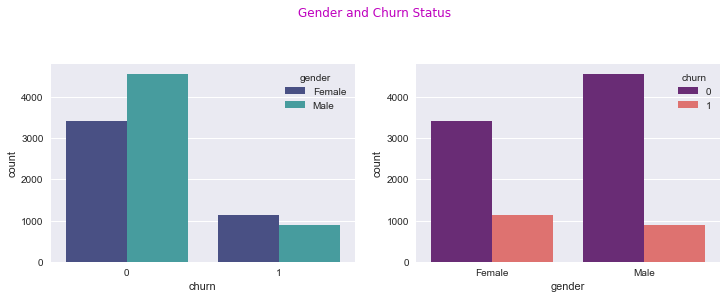

In [65]:
# Next analyzing the impact of gender on the churn rate
plt.figure(figsize=(12,8))
plt.suptitle('Gender and Churn Status',size=12,fontname='Ariel',color='m')
plt.subplot(2,2,1)
sns.countplot(x='churn',hue='gender',data=df,palette='mako')

plt.subplot(2,2,2)
sns.countplot(x='gender',hue='churn',data=df,palette='magma')

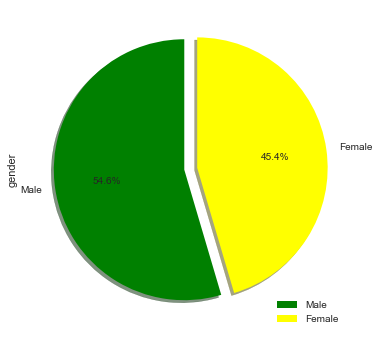

In [90]:
# Total gender percentage
plt.style.use('seaborn')
diff_gender = pd.DataFrame(df['gender'].value_counts())
explode = (0.0,0.1)
colors =['green','yellow']
labels ='Male','Female'
diff_gender.plot.pie(y='gender',figsize=(6,6),colors = colors, autopct='%1.1f%%',explode=explode,startangle=90,shadow=True,labels=labels)
plt.show()

In [87]:
male_churn =df.query('gender=="Male" & churn==1').count()['churn']
female_churn =df.query('gender == "Female" & churn ==1').count()['churn']
male_churn_rate= round((male_churn/total_churn)*100,2)
female_churn_rate = round((female_churn/total_churn)*100,2)
gender_churn_data = [['Male',male_churn_rate],['Female',female_churn_rate]]
gender_churn_df=pd.DataFrame(gender_churn_data,columns=["gender","churn rate(%)"])
gender_churn_df

,gender,churn rate(%)
0,Male,44.08
1,Female,55.92


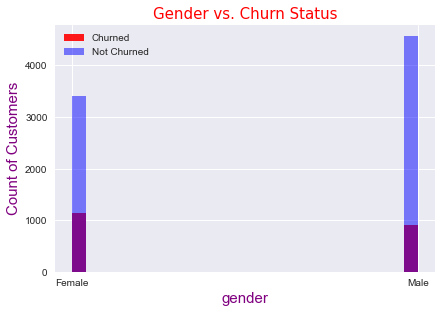

In [119]:
# Plotting a histogram to check for normality of the data
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(df[df['churn']==1]['gender'],bins=25,alpha=0.9,color='red',label='Churned')
plt.hist(df[df['churn']==0]['gender'],bins=25,alpha=0.5,color='blue',label='Not Churned')

plt.xlabel('gender',size=15,color='purple')
plt.ylabel('Count of Customers',size= 15,color='purple')
plt.title('Gender vs. Churn Status',color='red',fontname='Ariel',size=15)
plt.legend()


In [78]:
# Data doesn't look normal
male_df = df[df['gender']=='Male']
female_df = df[df['gender']=='Female']
stats.kruskal(male_df['churn'],female_df['churn'])

KruskalResult(statistic=113.43775539389111, pvalue=1.7302867496277846e-26)

In [79]:
# p-value<0.05 hence we reject the null and can conclude that gender has an impact on the churn rate

In [91]:
# Now testing for the impact of the other numerical variables on the churn rate
# Analyzing the Impact of age on churn rate
agegroup = [['Young','18-24'],['Adults','25-64'],['Seniors','65 & Above']]
agegroup_df=pd.DataFrame(agegroup,columns=["age_groups","age_group_range"])
agegroup_df

,age_groups,age_group_range
0,Young,18-24
1,Adults,25-64
2,Seniors,65 & Above


In [92]:
# Creating age groups
df['AgeGroup']=pd.cut(df.age,bins=[17,24,64,120],labels =['young','adult','senior'])
# Turning the column data type into a string
df['AgeGroup']= df.AgeGroup.astype(str)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,AgeGroup
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,adult
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,adult
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,adult
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,adult
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,adult


In [94]:
young = df.query('age>=18 and age<=24 ')
adult = df.query('age>=25 and age<=64')
senior = df.query('age>=65')
# printing the number of customers falling in different age groups
print('There are', young['age'].count(), 'young customers')
print('There are', adult['age'].count(), 'adult customers')
print('There are', senior['age'].count(), 'senior customers')

There are 457 young customers
There are 9261 adult customers
There are 282 senior customers


Text(0.5, 1.0, 'Age Groups vs. Churn Status')

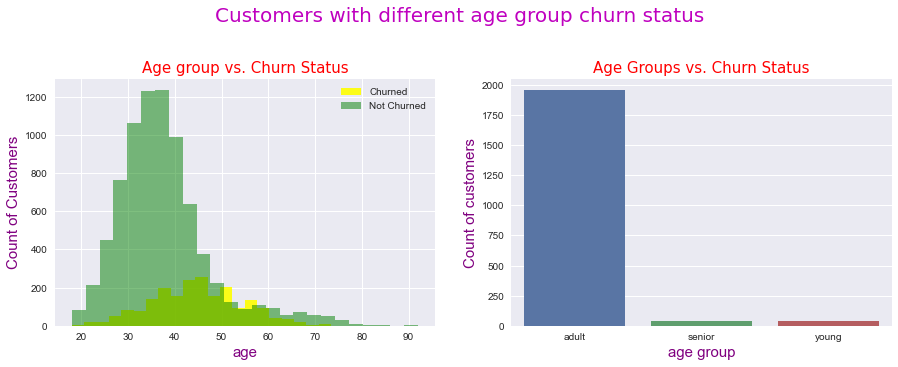

In [100]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.suptitle('Customers with different age group churn status',fontname='Ariel',size=20,color='m')

plt.subplot(2,2,1)
plt.hist(df[df['churn']==1]['age'],bins=25,alpha=0.9,color='yellow',label='Churned')
plt.hist(df[df['churn']==0]['age'],bins=25,alpha=0.5,color='green',label='Not Churned')

plt.xlabel('age',size=15,color='purple')
plt.ylabel('Count of Customers',size= 15,color='purple')
plt.title('Age group vs. Churn Status',color='red',fontname='Ariel',size=15)
plt.legend()
plt.subplot(2,2,2)

# Bar plot of Differentagegroup levels Vs churn status
sns.countplot(x = 'AgeGroup', data = df[df["churn"] == 1])
plt.xlabel("age group", size = 15, color = "purple")
plt.ylabel("Count of customers", size = 15, color = "purple")
plt.title("Age Groups vs. Churn Status", color='red', fontname = "Ariel", size = 15)

<AxesSubplot:xlabel='churn', ylabel='age'>

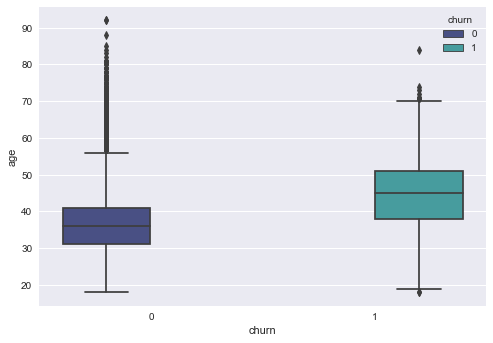

In [170]:
sns.boxplot(y='age',x='churn',hue='churn',data=df,palette= 'mako')

In [101]:
young_churn =df.query('AgeGroup=="young" & churn==1').count()['churn']
adult_churn =df.query('AgeGroup == "adult" & churn ==1').count()['churn']
senior_churn = df.query('AgeGroup== "senior" & churn==1').count()['churn']
young_churn_rate= round((young_churn/total_churn)*100,2)
adult_churn_rate = round((adult_churn/total_churn)*100,2)
senior_churn_rate = round((senior_churn/total_churn)*100,2)
age_churn_data = [['young',young_churn,young_churn_rate],['adult',adult_churn,adult_churn_rate],['senior',senior_churn,senior_churn_rate]]
age_churn_df=pd.DataFrame(age_churn_data,columns=["age","churn per group","churn rate(%)"])
age_churn_df

,age,churn per group,churn rate(%)
0,young,40,1.96
1,adult,1954,95.93
2,senior,43,2.11


In [103]:
print(stats.describe(young['churn']))
print(stats.describe(adult['churn']))
print(stats.describe(senior['churn']))

DescribeResult(nobs=457, minmax=(0, 1), mean=0.087527352297593, variance=0.08004146032477256, skewness=2.9190620516513306, kurtosis=6.52092326139088)
DescribeResult(nobs=9261, minmax=(0, 1), mean=0.21099233344131305, variance=0.16649254648549403, skewness=1.4166592772508773, kurtosis=0.006923507820978614)
DescribeResult(nobs=282, minmax=(0, 1), mean=0.1524822695035461, variance=0.12969132530728653, skewness=1.9334052479693318, kurtosis=1.7380558528753536)


In [104]:
stats.kruskal(young['churn'],adult['churn'],senior['churn'])

KruskalResult(statistic=45.616050508513744, pvalue=1.2433702990481629e-10)

In [105]:
# p-value<0.05 hence we can reject the null and conclude that age has an impact on the churn rate.

In [107]:
# Analyzing the impact of having a credit card as one of the products on the churn status
total_churn = df.query('churn==1').count()['churn']
has_card_churn= df.query('credit_card==1 & churn ==1').count()['churn']
has_card_churnrate = round((has_card_churn/total_churn)*100,2)
has_nocard_churn = df.query('credit_card==0 & churn ==1').count()['churn']
has_nocard_churnrate= round((has_nocard_churn/total_churn)*100,2)
creditcard_churn_data= [['hascard',has_card_churn,has_card_churnrate],['hasnocard',has_nocard_churn,has_nocard_churnrate]]
creditcard_churn_df=pd.DataFrame(creditcard_churn_data,columns=['cardstatus','churn per group','churn rate(%)'])
creditcard_churn_df

,cardstatus,churn per group,churn rate(%)
0,hascard,1424,69.91
1,hasnocard,613,30.09


Text(0.5, 1.0, 'card status vs. churn status')

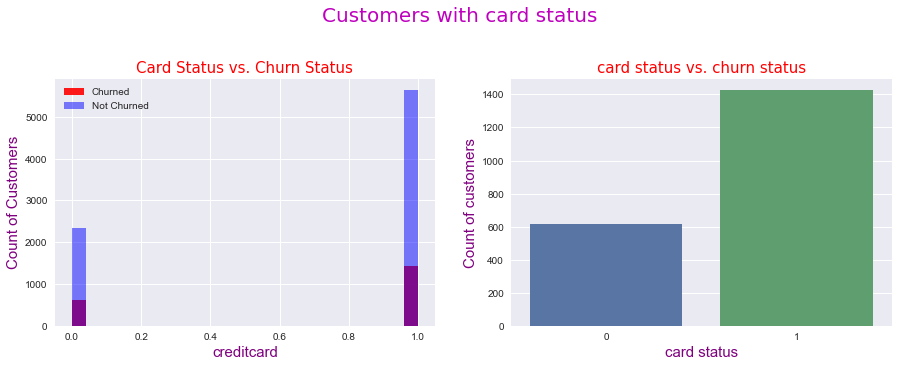

In [108]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.suptitle('Customers with card status',fontname='Ariel',size=20,color='m')

plt.subplot(2,2,1)
plt.hist(df[df['churn']==1]['credit_card'],bins=25,alpha=0.9,color='red',label='Churned')
plt.hist(df[df['churn']==0]['credit_card'],bins=25,alpha=0.5,color='blue',label='Not Churned')

plt.xlabel('creditcard',size=15,color='purple')
plt.ylabel('Count of Customers',size= 15,color='purple')
plt.title('Card Status vs. Churn Status',color='red',fontname='Ariel',size=15)
plt.legend()
plt.subplot(2,2,2)

# Bar plot of Different card status Vs churn status
sns.countplot(x = 'credit_card', data = df[df["churn"] == 1])
plt.xlabel("card status", size = 15, color = "purple")
plt.ylabel("Count of customers", size = 15, color = "purple")
plt.title("card status vs. churn status", color='red', fontname = "Ariel", size = 15)

<AxesSubplot:xlabel='credit_card', ylabel='count'>

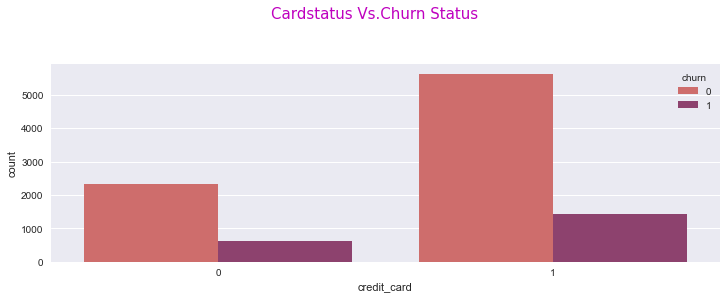

In [116]:
plt.figure(figsize=(12,8))
plt.suptitle('Cardstatus Vs.Churn Status',size=15,fontname='Ariel',color='m')

plt.subplot(2,1,1)
sns.countplot(x='credit_card',hue='churn',data=df,palette='flare')

In [117]:
# The data doesn't look normal
has_crd= df[df['credit_card']==1]
no_crd= df[df['credit_card']==0]
stats.kruskal(has_crd['churn'],no_crd['churn'])

KruskalResult(statistic=0.5094260303474855, pvalue=0.4753874287573231)

In [118]:
# pvalue>0.05 hence we accept the null that there is no significant difference between the groups of people who has a credit card and churn & those without a card who churn.

Text(0.5, 1.0, 'No of products vs. Churn Status')

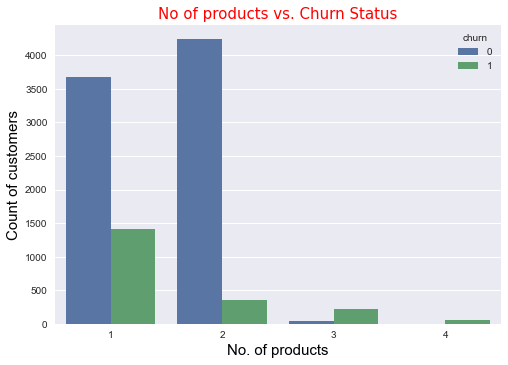

In [125]:
# Analyzing the impact of number of products on the churn rate
sns.countplot(x='products_number',hue='churn',data=df)
plt.xlabel("No. of products", size = 15, color = "black")
plt.ylabel("Count of customers", size = 15, color = "black")
plt.title("No of products vs. Churn Status", color='red', fontname = "Ariel", size = 15)

<AxesSubplot:xlabel='churn', ylabel='products_number'>

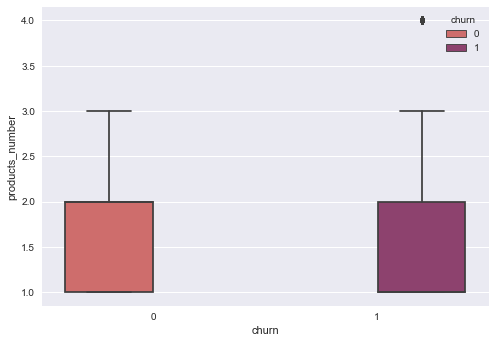

In [176]:
sns.boxplot(y='products_number',x='churn',hue='churn',data=df,palette= 'flare')

In [126]:
oneproduct_churn =df.query('products_number== 1 & churn==1').count()['churn']
twoproduct_churn =df.query('products_number == 2 & churn ==1').count()['churn']
threeproduct_churn = df.query('products_number== 3 & churn==1').count()['churn']
fourproduct_churn =df.query('products_number ==4 & churn ==1').count()['churn']
oneproduct_churn_rate= round((oneproduct_churn/total_churn)*100,2)
twoproduct_churn_rate = round((twoproduct_churn/total_churn)*100,2)
threeproduct_churn_rate = round((threeproduct_churn/total_churn)*100,2)
fourproduct_churn_rate= round((fourproduct_churn/total_churn)*100,2)
noofproducts_churn_data = [['oneproduct',oneproduct_churn,oneproduct_churn_rate],['twoproduct',twoproduct_churn,twoproduct_churn_rate],['threeproduct',threeproduct_churn,threeproduct_churn_rate],['fourproduct',fourproduct_churn,fourproduct_churn_rate]]
noofproducts_churn_df=pd.DataFrame(noofproducts_churn_data,columns=["no of products","churn per group","churn rate(%)"])
noofproducts_churn_df

,no of products,churn per group,churn rate(%)
0,oneproduct,1409,69.17
1,twoproduct,348,17.08
2,threeproduct,220,10.80
3,fourproduct,60,2.95


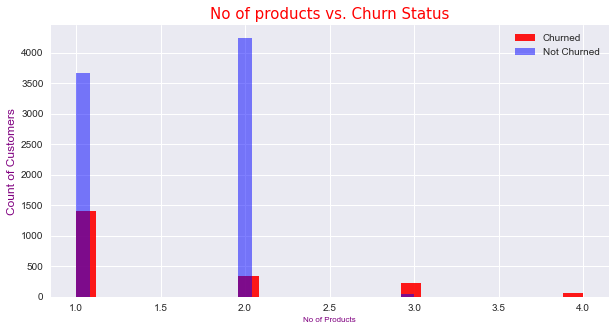

In [135]:
# Hyp. test for having products on churn rate
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.hist(df[df['churn']==1]['products_number'],bins=25,alpha=0.9,color='red',label='Churned')
plt.hist(df[df['churn']==0]['products_number'],bins=25,alpha=0.5,color='blue',label='Not Churned')
plt.xlabel('No of Products',size=8,color='purple')
plt.ylabel('Count of Customers',size= 12,color='purple')
plt.title('No of products vs. Churn Status',color='red',fontname='Ariel',size=15)
plt.legend()

In [136]:
# Data is not normal
one_p = df[df['products_number']==1]
two_p= df[df['products_number']==2]
three_p= df[df['products_number']==3]
four_p= df[df['products_number']==4]
stats.kruskal(one_p['churn'],two_p['churn'],three_p['churn'],four_p['churn'])

KruskalResult(statistic=1503.4789985708842, pvalue=0.0)

In [137]:
# p-value<0.05 hence we reject the null and can conclude that having more number of products have impact on the churn rate.

<AxesSubplot:xlabel='tenure', ylabel='count'>

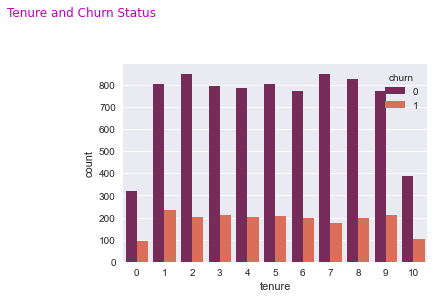

In [138]:
# Let's now see the impact of tenure on the churn rate
plt.figure(figsize=(12,8))
plt.suptitle('Tenure and Churn Status',size=12,fontname='Ariel',color='m')
plt.subplot(2,2,2)
sns.countplot(x='tenure',hue='churn',data=df,palette='rocket')

In [139]:
# We see that tenure doesn't have much impact on the churn status. But those customers who have been for less than a year or for about 10 years have a relatively lower churn rate.

<AxesSubplot:xlabel='churn', ylabel='tenure'>

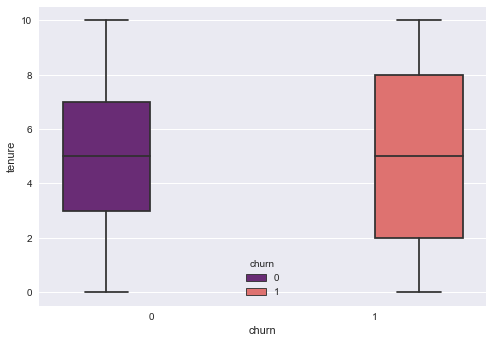

In [178]:
sns.boxplot(y='tenure',x='churn',hue = 'churn',data=df,palette= 'magma')

<AxesSubplot:xlabel='active_member', ylabel='count'>

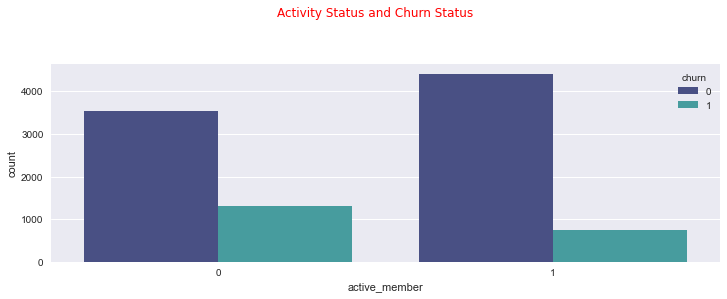

In [142]:
# Let's see the impact of being an active member on the churn rate
plt.figure(figsize=(12,8))
plt.suptitle('Activity Status and Churn Status',size=12,fontname='Ariel',color='r')
plt.subplot(2,1,1)
sns.countplot(x='active_member',hue='churn',data=df,palette='mako')

In [143]:
activemember_churn =df.query('active_member==1 & churn==1').count()['churn']
notactivemember_churn =df.query('active_member == 0 & churn ==1').count()['churn']
activemember_churn_rate= round((activemember_churn/total_churn)*100,2)
notactivemember_churn_rate = round((notactivemember_churn/total_churn)*100,2)
activemember_churn_data = [['activemember',activemember_churn,activemember_churn_rate],['notactive member',notactivemember_churn ,notactivemember_churn_rate]]
activemember_churn_df=pd.DataFrame(activemember_churn_data,columns=["activemember","churn per group","churn rate(%)"])
activemember_churn_df

,activemember,churn per group,churn rate(%)
0,activemember,735,36.08
1,notactive member,1302,63.92


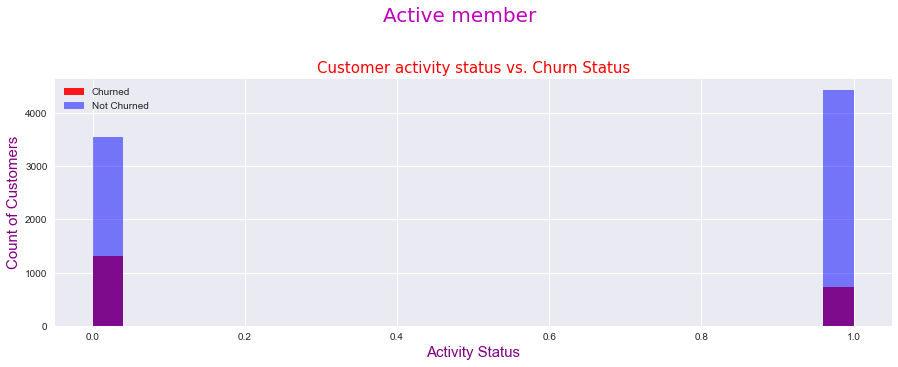

In [145]:
# Next testing hypothesis:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.suptitle('Active member',fontname='Ariel',size=20,color='m')
plt.subplot(2,1,1)
plt.hist(df[df['churn']==1]['active_member'],bins=25,alpha=0.9,color='red',label='Churned')
plt.hist(df[df['churn']==0]['active_member'],bins=25,alpha=0.5,color='blue',label='Not Churned')
plt.xlabel('Activity Status',size=15,color='purple')
plt.ylabel('Count of Customers',size= 15,color='purple')
plt.title('Customer activity status vs. Churn Status',color='red',fontname='Ariel',size=15)
plt.legend()

In [146]:
# The data doesn't look normal
active_n = df[df['active_member']==1]
nonactive_n = df[df['active_member']==0]
stats.kruskal(active_n['churn'],nonactive_n['churn'])

KruskalResult(statistic=243.73601646306605, pvalue=6.027161172100523e-55)

In [147]:
# p-value< 0.05 hence we reject the null and can conclude that a customer's activity status has an impact on the churn rate.

In [148]:
# We want to test whether people with a high salary and zero balance churn more.
dff = df[df['balance']==0]
dff.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,AgeGroup
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1,adult
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0,adult
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0,adult
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,young
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0,adult


In [149]:
dff['Salarygroup']= pd.cut(dff.estimated_salary,bins =[11,65000,130000,200000],labels= [0,1,2]) # 0=Low,1=Medium,2=High 
dff['Salarygroup']= dff.Salarygroup.astype(float)
dff.head()

C:\Users\chowd\AppData\Local\Temp\ipykernel_31340\4056710703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Salarygroup']= pd.cut(dff.estimated_salary,bins =[11,65000,130000,200000],labels= [0,1,2]) # 0=Low,1=Medium,2=High
C:\Users\chowd\AppData\Local\Temp\ipykernel_31340\4056710703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Salarygroup']= dff.Salarygroup.astype(float)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,AgeGroup,Salarygroup
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1,adult,1.0
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0,adult,1.0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0,adult,0.0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,young,1.0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0,adult,0.0


In [150]:
dff['Salarygroup'].value_counts()

2.0    1245
1.0    1197
0.0    1175
Name: Salarygroup, dtype: int64

In [151]:
low= dff.query('estimated_salary>=11 and estimated_salary<=65000 ')
medium = dff.query('estimated_salary>=66000 and estimated_salary<=130000')
high = dff.query('estimated_salary>=131000 and estimated_salary<=200000')
# printing the number of customers falling in different salary levels
print('There are', low['estimated_salary'].count(), 'customers with low salary')
print('There are', medium['estimated_salary'].count(), 'customers with medium salary')
print('There are', high['estimated_salary'].count(), 'customers with high salary')

There are 1175 customers with low salary
There are 1169 customers with medium salary
There are 1221 customers with high salary


Text(0.5, 1.0, 'Salary Groups with zero balance vs. Churn Status')

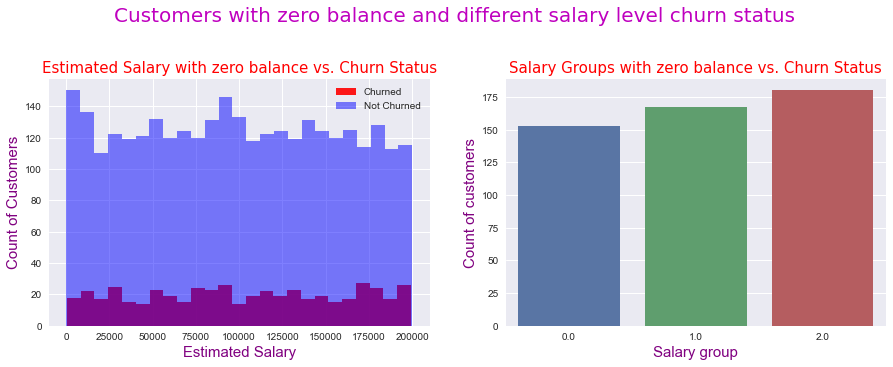

In [152]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.suptitle('Customers with zero balance and different salary level churn status',fontname='Ariel',size=20,color='m')
plt.subplot(2,2,1)
plt.hist(dff[dff['churn']==1]['estimated_salary'],bins=25,alpha=0.9,color='red',label='Churned')
plt.hist(dff[dff['churn']==0]['estimated_salary'],bins=25,alpha=0.5,color='blue',label='Not Churned')
plt.xlabel('Estimated Salary',size=15,color='purple')
plt.ylabel('Count of Customers',size= 15,color='purple')
plt.title('Estimated Salary with zero balance vs. Churn Status',color='red',fontname='Ariel',size=15)
plt.legend()
plt.subplot(2,2,2)

sns.countplot(x = 'Salarygroup', data = dff[dff["churn"] == 1])
plt.xlabel("Salary group", size = 15, color = "purple")
plt.ylabel("Count of customers", size = 15, color = "purple")
plt.title("Salary Groups with zero balance vs. Churn Status", color='red', fontname = "Ariel", size = 15)

In [154]:
# We observe that those customers with high salary and zero balance churn more than those with low and medium salary with zero balance.
# The data is not normally distributed so we use kruskal test for hypothesis testing.
total_churn = df.query('churn==1').count()['churn']
lowsal_churn_number=dff.query('Salarygroup == 0 & churn==1').count()['churn']
lowsal_churn_rate = round((lowsal_churn_number/total_churn)*100,2)
mediumsal_churn_number=dff.query('Salarygroup == 1 & churn ==1').count()['churn']
mediumsal_churn_rate = round((mediumsal_churn_number/total_churn)*100,2)
highsal_churn_number= dff.query('Salarygroup== 2 & churn==1').count()['churn']
highsal_churn_rate= round((highsal_churn_number/total_churn)*100,2)
salary_churn_data = [['low salary',lowsal_churn_number,lowsal_churn_rate],['medium salary',mediumsal_churn_number,mediumsal_churn_rate],['high salary',highsal_churn_number,highsal_churn_rate]]
salary_churn_df=pd.DataFrame(salary_churn_data,columns=["salary groups","churn per group","churn rate(%)"])
salary_churn_df

,salary groups,churn per group,churn rate(%)
0,low salary,153,7.51
1,medium salary,167,8.20
2,high salary,180,8.84


In [155]:
# The data doesn't look normal
print(stats.describe(low['churn']))
print(stats.describe(medium['churn']))
print(stats.describe(high['churn']))

DescribeResult(nobs=1175, minmax=(0, 1), mean=0.1302127659574468, variance=0.11335387292036679, skewness=2.1975998316384033, kurtosis=2.8294450200171406)
DescribeResult(nobs=1169, minmax=(0, 1), mean=0.1394354148845167, variance=0.12009591384745187, skewness=2.081779761191438, kurtosis=2.33380697410628)
DescribeResult(nobs=1221, minmax=(0, 1), mean=0.14250614250614252, variance=0.12229830426551741, skewness=2.0453436119777515, kurtosis=2.1834304910581945)


In [156]:
# doing a normality check
print(stats.shapiro(low['churn']))
print(stats.shapiro(medium['churn']))
print(stats.shapiro(high['churn']))

ShapiroResult(statistic=0.39592164754867554, pvalue=0.0)
ShapiroResult(statistic=0.41049790382385254, pvalue=0.0)
ShapiroResult(statistic=0.41518592834472656, pvalue=0.0)


In [157]:
# Each p-value<0.05 and W is not 1 hence the data is not normally dustributed.
stats.kruskal(low['churn'],medium['churn'],high['churn'])

KruskalResult(statistic=0.82103820801733, pvalue=0.6633058360322271)

In [158]:
# p-value>0.05 hence we accept the null that there is no significant difference in the churn rate between people who have a high salary and zero balance & those who have a low salary & zero balance.

<AxesSubplot:xlabel='churn', ylabel='credit_score'>

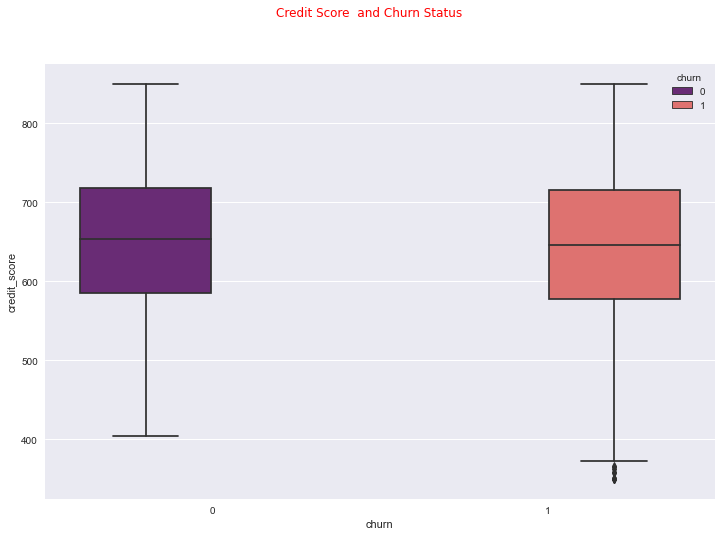

In [191]:
# Credit score and churn status
plt.figure(figsize=(12,8))
plt.suptitle('Credit Score  and Churn Status',size=12,fontname='Ariel',color='r')
sns.boxplot(y='credit_score',x='churn',hue = 'churn',data=df,palette= 'magma')

In [ ]:
# Implies people with a lower credit score have higher chances of churning.

<AxesSubplot:xlabel='churn', ylabel='balance'>

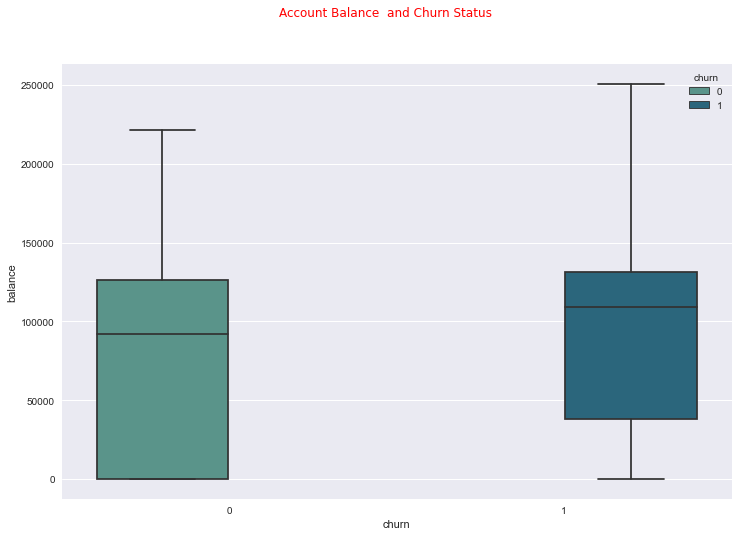

In [192]:
# Account balance and churn status
plt.figure(figsize=(12,8))
plt.suptitle('Account Balance  and Churn Status',size=12,fontname='Ariel',color='r')
sns.boxplot(y='balance',x='churn',hue = 'churn',data=df,palette= 'crest')

In [200]:
# Implies people with a higher account balance have a higher churn status